In [66]:
import pandas as pd
import numpy as np
from minisom import MiniSom
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import LabelEncoder
from pylab import *

In [404]:
header = ["Class Name","handicapped-infants","water-project-cost-sharing","adoption-of-the-budget-resolution",
"physician-fee-freeze","el-salvador-aid","religious-groups-in-schools","anti-satellite-test-ban",
"aid-to-nicaraguan-contras","mx-missile","immigration","synfuels-corporation-cutback","education-spending",
"superfund-right-to-sue","crime","duty-free-exports","export-administration-act-south-africa"]


data = pd.read_csv("house-votes-84.data.txt",na_values="?",names=header)

data

,Class Name,handicapped-infants,water-project-cost-sharing,adoption-of-the-budget-resolution,physician-fee-freeze,el-salvador-aid,religious-groups-in-schools,anti-satellite-test-ban,aid-to-nicaraguan-contras,mx-missile,immigration,synfuels-corporation-cutback,education-spending,superfund-right-to-sue,crime,duty-free-exports,export-administration-act-south-africa
0,republican,n,y,n,y,y,y,n,n,n,y,NaN,y,y,y,n,y
1,republican,n,y,n,y,y,y,n,n,n,n,n,y,y,y,n,NaN
2,democrat,NaN,y,y,NaN,y,y,n,n,n,n,y,n,y,y,n,n
3,democrat,n,y,y,n,NaN,y,n,n,n,n,y,n,y,n,n,y
4,democrat,y,y,y,n,y,y,n,n,n,n,y,NaN,y,y,y,y
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
430,republican,n,n,y,y,y,y,n,n,y,y,n,y,y,y,n,y
431,democrat,n,n,y,n,n,n,y,y,y,y,n,n,n,n,n,y
432,republican,n,NaN,n,y,y,y,n,n,n,n,y,y,y,y,n,y
433,republican,n,n,n,y,y,y,NaN,NaN,NaN,NaN,n,y,y,y,n,y


## Na

In [423]:
cols = data.columns
dtf = data.dropna()
#republican_modes = list(data[data["Class Name"] == "republican"].mode().values[0])
#democrat_modes = list(data[data["Class Name"] == "democrat"].mode().values[0])

#rep_fillna = dict(zip(cols,republican_modes))
#dem_fillna = dict(zip(cols,republican_modes))

In [424]:
#rep_filled = data[data["Class Name"] == "republican"].fillna(rep_fillna)
#dem_filled = data[data["Class Name"] == "democrat"].fillna(dem_fillna)
#dtf = pd.concat([rep_filled,dem_filled])
dtf = dtf.sample(frac=1)
dtf

,Class Name,handicapped-infants,water-project-cost-sharing,adoption-of-the-budget-resolution,physician-fee-freeze,el-salvador-aid,religious-groups-in-schools,anti-satellite-test-ban,aid-to-nicaraguan-contras,mx-missile,immigration,synfuels-corporation-cutback,education-spending,superfund-right-to-sue,crime,duty-free-exports,export-administration-act-south-africa
385,democrat,y,y,n,n,y,y,n,n,n,n,y,y,y,y,y,n
176,republican,n,n,y,y,n,n,y,y,y,y,n,n,n,y,y,y
213,democrat,n,y,y,n,n,y,n,y,y,n,y,n,y,n,y,y
82,republican,n,n,n,y,y,y,n,n,n,y,n,y,y,y,n,y
58,republican,n,y,n,y,y,y,n,n,n,y,n,y,y,y,n,y
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
412,republican,n,n,n,y,y,y,n,n,n,y,n,y,y,y,n,y
369,republican,n,y,n,y,y,y,n,n,n,n,n,n,y,y,n,y
411,democrat,y,n,y,n,n,y,y,y,y,y,y,n,n,n,n,y
116,democrat,y,n,y,n,n,n,y,y,y,n,y,n,n,n,y,y


## Encoding

In [425]:
le = LabelEncoder()
dtf = dtf.apply(le.fit_transform)
dtf.describe()

,Class Name,handicapped-infants,water-project-cost-sharing,adoption-of-the-budget-resolution,physician-fee-freeze,el-salvador-aid,religious-groups-in-schools,anti-satellite-test-ban,aid-to-nicaraguan-contras,mx-missile,immigration,synfuels-corporation-cutback,education-spending,superfund-right-to-sue,crime,duty-free-exports,export-administration-act-south-africa
count,232.000000,232.000000,232.000000,232.000000,232.000000,232.000000,232.000000,232.000000,232.000000,232.000000,232.000000,232.000000,232.000000,232.000000,232.000000,232.000000,232.000000
mean,0.465517,0.413793,0.461207,0.530172,0.487069,0.551724,0.642241,0.534483,0.512931,0.487069,0.551724,0.344828,0.465517,0.547414,0.642241,0.370690,0.814655
std,0.499888,0.493577,0.499571,0.500168,0.500913,0.498393,0.480377,0.499888,0.500913,0.500913,0.498393,0.476340,0.499888,0.498823,0.480377,0.484034,0.389417
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
50%,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000
75%,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [426]:
X = dtf.values
X

array([[0, 1, 1, ..., 1, 1, 0],
       [1, 0, 0, ..., 1, 1, 1],
       [0, 0, 1, ..., 0, 1, 1],
       ...,
       [0, 1, 0, ..., 0, 0, 1],
       [0, 1, 0, ..., 0, 1, 1],
       [1, 0, 0, ..., 1, 0, 1]])

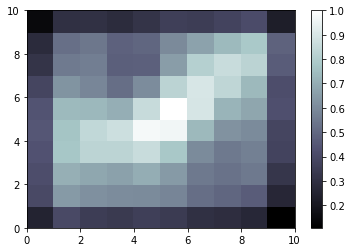

In [432]:
som = MiniSom(x=10, y=10, input_len= 17, sigma= 3, learning_rate = 0.5)
som.random_weights_init(X)
som.train_random(data = X, num_iteration = 1000)

bone()
pcolor(som.distance_map().T)
colorbar()

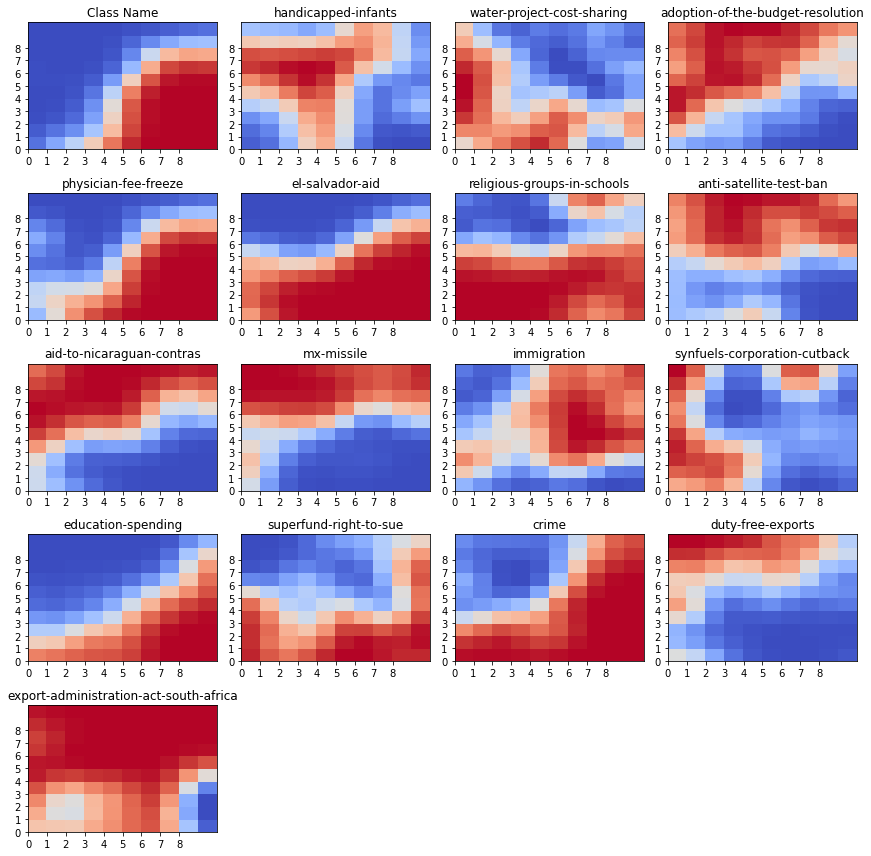

In [433]:
W = som.get_weights()
plt.figure(figsize=(12, 12))
for i, f in enumerate(cols):
    plt.subplot(5, 4, i+1)
    plt.title(f)
    plt.pcolor(W[:,:,i].T, cmap='coolwarm')
    plt.xticks(np.arange(8+1))
    plt.yticks(np.arange(8+1))
plt.tight_layout()
plt.show()